Masih dengan topik machine learning nih Sob, kali ini kita akan membahas bagaiamana algoritma machine learning dapat mendeteksi diabetes. Diabetes merupakan salah satu masalah kesehatan yang terus meningkat di seluruh dunia. Diabetes dapat menyebabkan komplikasi serius, seperti penyakit jantung, stroke, gangguan penglihatan, dan kerusakan saraf, jika tidak terkontrol dengan baik. Oleh karena itu, sangat penting untuk memahami faktor-faktor yang dapat mempengaruhi terjadinya diabetes dan mengembangkan strategi yang efektif untuk mencegah dan mengelolanya.

Salah satu cara untuk memahami faktor-faktor yang dapat mempengaruhi terjadinya diabetes adalah dengan menggunakan data. Kita dapat menggunakan teknik machine learning untuk mengeksplorasi faktor-faktor yang dapat mempengaruhi terjadinya diabetes dan memprediksi kemumungkinan seseorang terdiagnosis dengan diabetes. Oke sebelum lanjut kalian bisa download datasetnya disini. 


# Eksplorasi Data

Pertama kita import terlebih dahulu library pandas, kemudian membaca dataset dan menyimpan data kedalam sebuah DataFrame.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Memahami Data dengan Statistik

In [3]:
# Melihat dimensi dataset dalam baris dan kolom
df.shape

(2000, 9)

dataset kita terdiri dari 2000 baris dan 9 kolom

In [4]:
# Melihat informasi dasar dataframe setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


dengan fungsi .info() kita dapat mengetahu informasi dasar dari datset kita seperti banyak baris, kolom, nama kolom, tipe data dari setiap kolom, jumlah memori yang digunakan dan berfungsi untuk mengecek apakah terdapat kolom yang memiliki nilai null.

In [5]:
# Melihat statistika deskriptif data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


fungsi describe() dapat kita gunakan untuk melihat sebaran data, terutama jika kita ingin mengetahui nilai rata-rata, standar deviasi, dan nilai-nilai ekstim lainnya. 

## Memahami Data Dengan Visual

Untuk melihat korelasi dari dua variable/fiture kita dapat menggunakan fungsi .corr()

<AxesSubplot: >

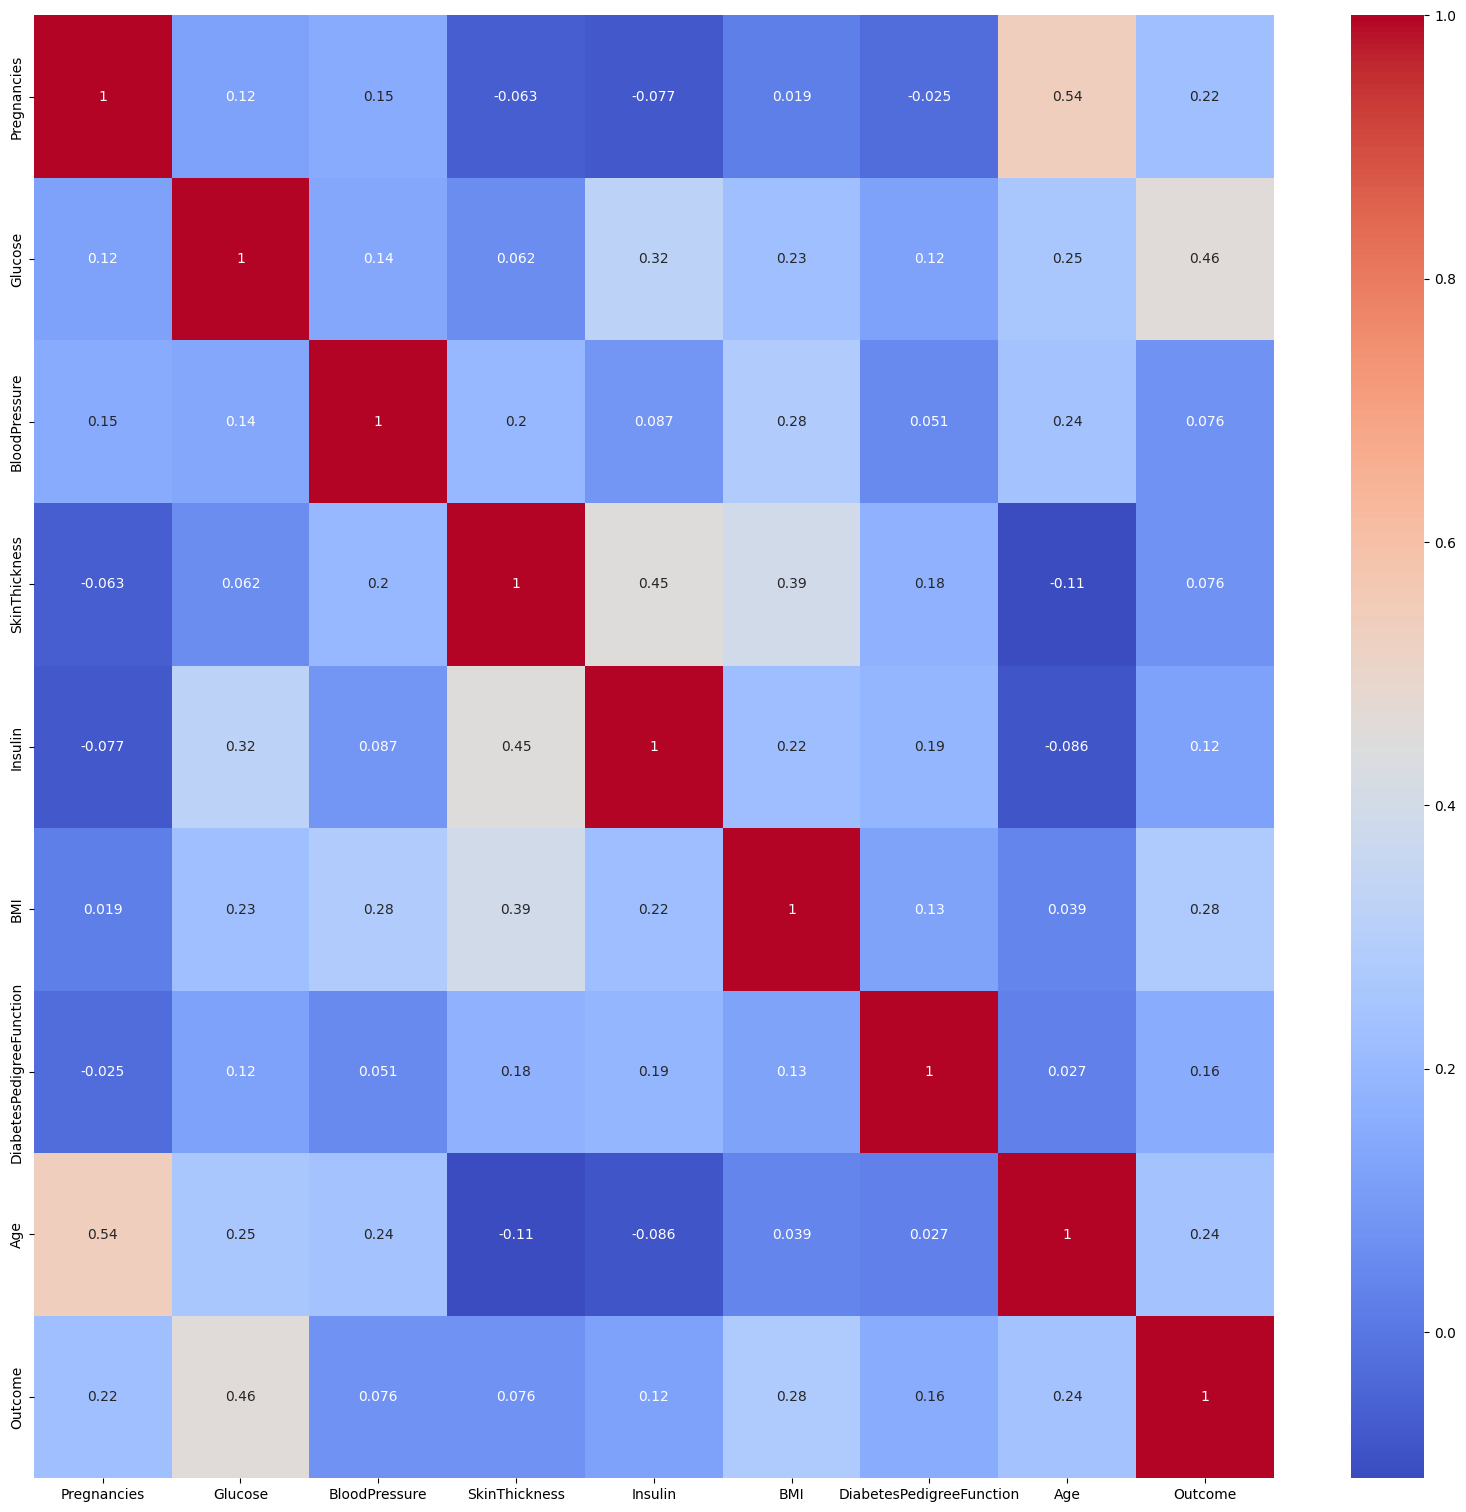

In [6]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig, ax = plt.subplots(figsize=(20,19))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Kita juga perlu mengetahui persebaran dari data label kita. Mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah true dan 10 row adalah false. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai true, dan hal ini tentunya tidak diinginkan.

In [7]:
# Distribusi Label

df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

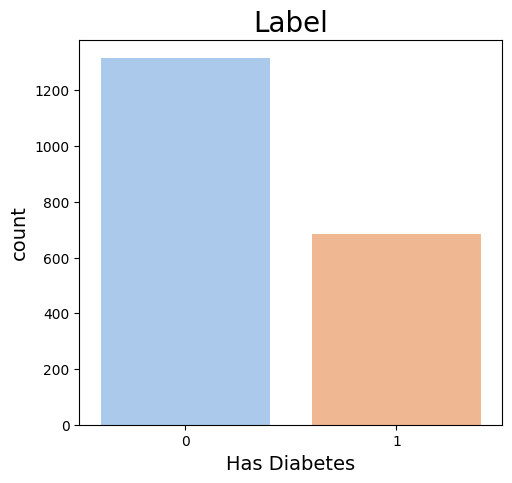

In [8]:
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data = df, palette = 'pastel')
plt.title('Label', fontsize = 20)
plt.xlabel('Has Diabetes', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.show()

# Data Pre-processing

In [9]:
import numpy as np

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Kita dapat lihat terdapat nama fiture kita yang terlalu panjang 'DiabetesPedigreeFunction', agar memudahkan kita singkat saja namanya menjadi 'DPF'

In [11]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Kita ingin mengetahui berapa banyak data yang bernilai 0 pada fiture 'Glucose','BloodPressure','SkinThickness','Insulin','BMI'  maka kita bisa ubah nilai 0 tersebut ke nan values. Hal ini dilakukan karena kita ingin data tersbut diganti dengan nilai mean, median atau yang lainnya. Agar akurasi model yang nanti akan kita buat menjadi tinggi.

In [12]:
# Mengubah nilai 0 pada fiture ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] menjadi NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

Untuk mengisi Nan values, kita perlu mengetahui distribusi data. Kita bisa melihat distribusi data dengan menggunakan garfik histogram.

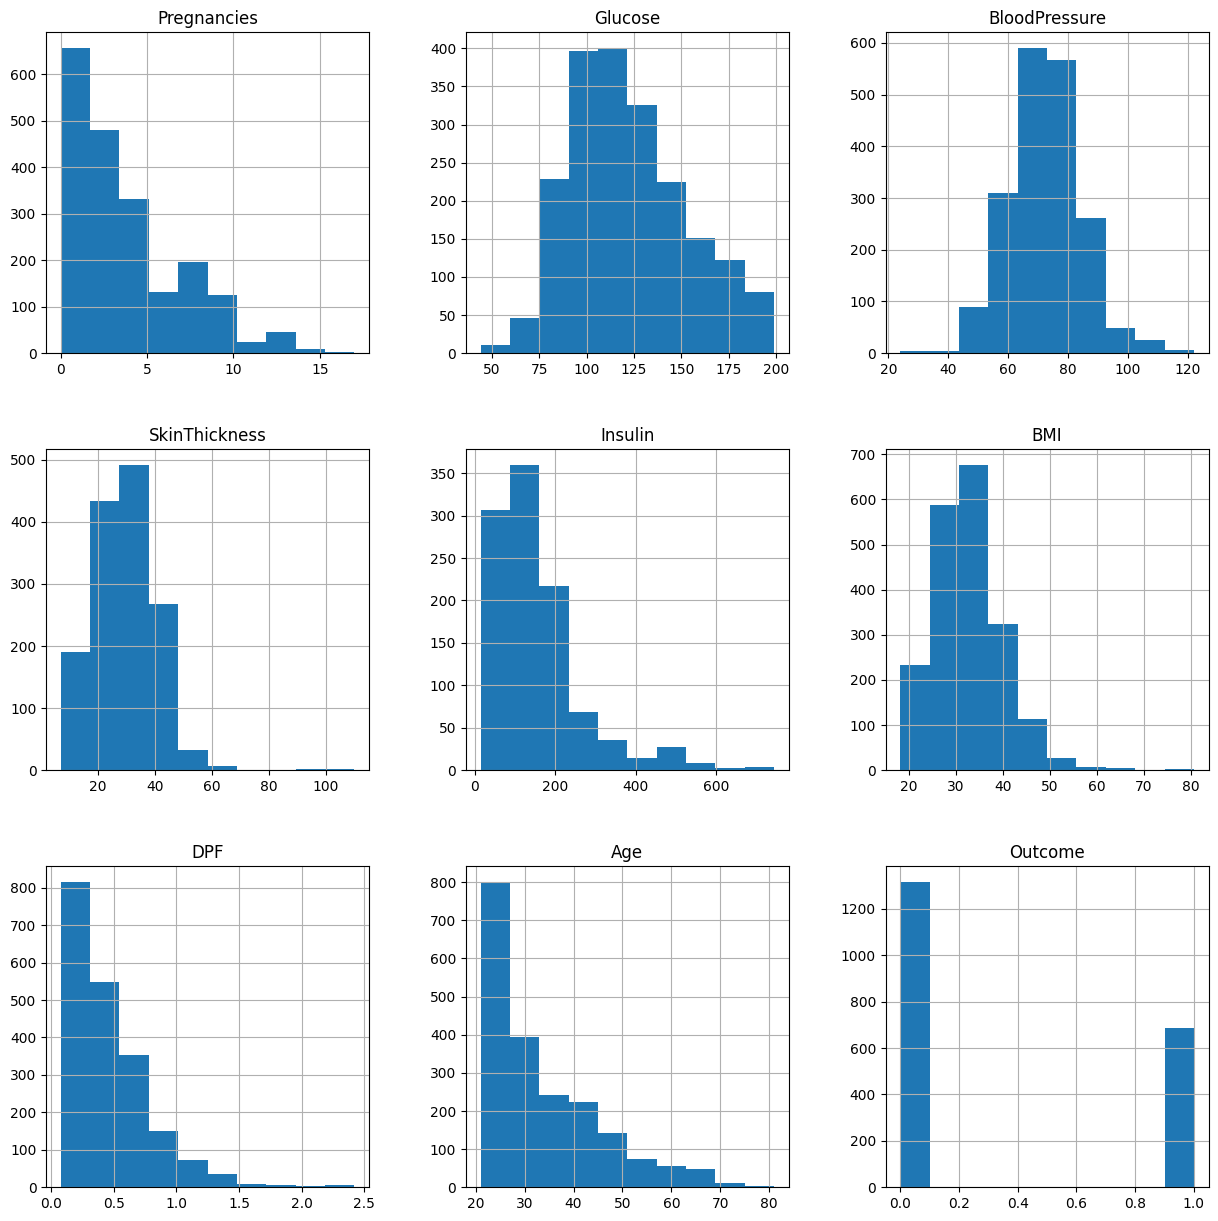

In [13]:
p = df_copy.hist(figsize = (15,15))

Dari grafik diatas kita bisa menyimpulkan bahwa nan value pada fiture Glucose dan BloodPressure bisa kita ganti dengan mean karena data tersebar merata, sementara untuk Nan Values pada fitures SkinThickness, Insulin, dan BMI kita ganti dengan median karena berdasarkan persebaran data tidak merata. 

In [14]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

Grafik histogram setelah mengubah nilai nan values dengan median dan mean.

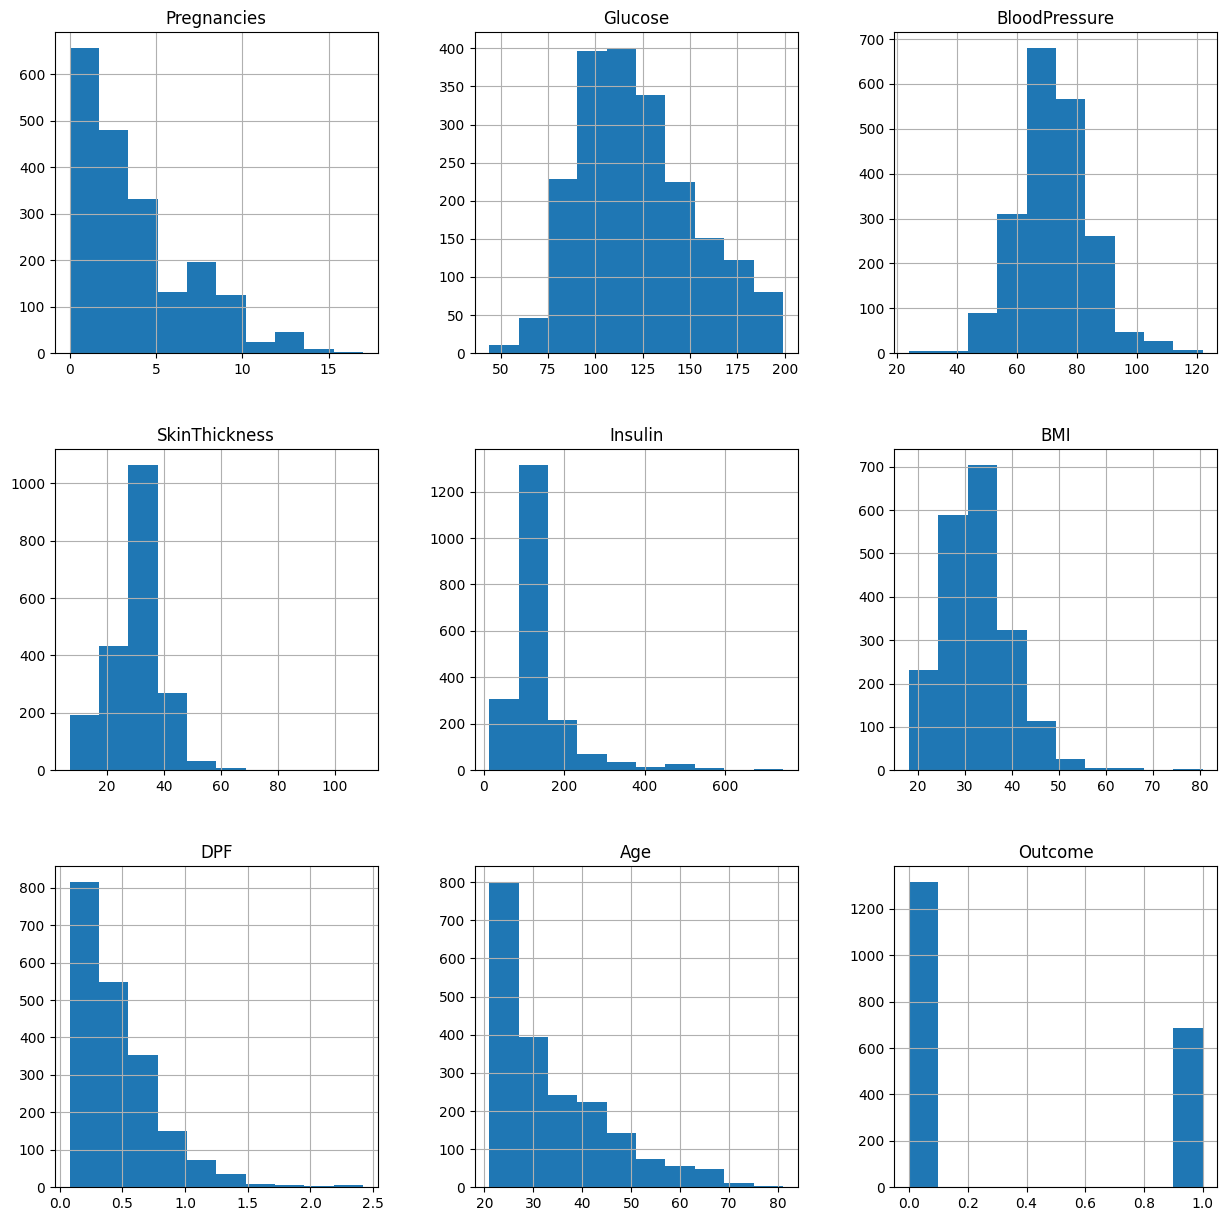

In [15]:
p = df_copy.hist(figsize=(15,15))

Kita bisa cek lagi apakah masih ada data nan values atau tidak.

In [16]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Membuat Model

Dalam dataset kita, label target sudah diketahui, yaitu kolom Outcome yang bernilai 1 untuk yang terdiagnosis diabetes dan 0 untuk yang tidak terdiagnosis diabetes, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Outcome] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Outcome] dari dataset.

In [17]:
X = df.drop(columns='Outcome')
y = df['Outcome']

Dataframe kita bagi menjadi train dataset dan test dataset. Train dataset digunakan untuk melatih model untuk dapat mengenali pola dalam data, sedangkan testing dataset digunakan untuk menguji model apakah dapat memprediksi label dari new observation yang belum dipelajari oleh model sebelumnya.

Dalam melakukan pembagian dataset kita dapat menggunakan fungsi train_test_split() dari library sklearn.model_selection.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


Pada projek kali ini kita akan menggunakan salah satu model machine learning decision tree.

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluasi Model

Untuk mengevaluasi model yang sudah kita buat kita bisa menggunakan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML. 

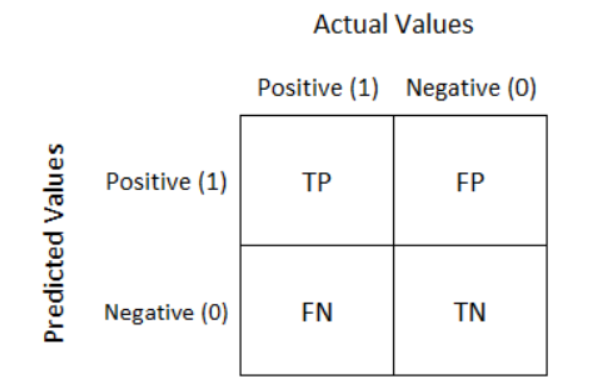

True Positive (TP): Jika orang diprediksi didiagnosis diabetes (Positif), dan orang aktualnya benar didiagnosis diabetes (Positif).

True Negative (TN): Jika orang diprediksi tidak didiagnosis diabetes (Negatif) dan orang aktualnya tidak didiagnosis diabetes (Negatif).

False Positive (FP): Jika orang diprediksi didiagnosis diabetes (Positif), tetapi orang ternyata aktualnya tidak didiagnosis diabetes (Negatif).

False Negatif (FN): Jika orang diprediksi tidak didiagnosis diabetes (Negatif), tetapi orang ternyata aktualnya didiagnosis diabetes (Positif).

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[268,   4],
       [  2, 126]], dtype=int64)

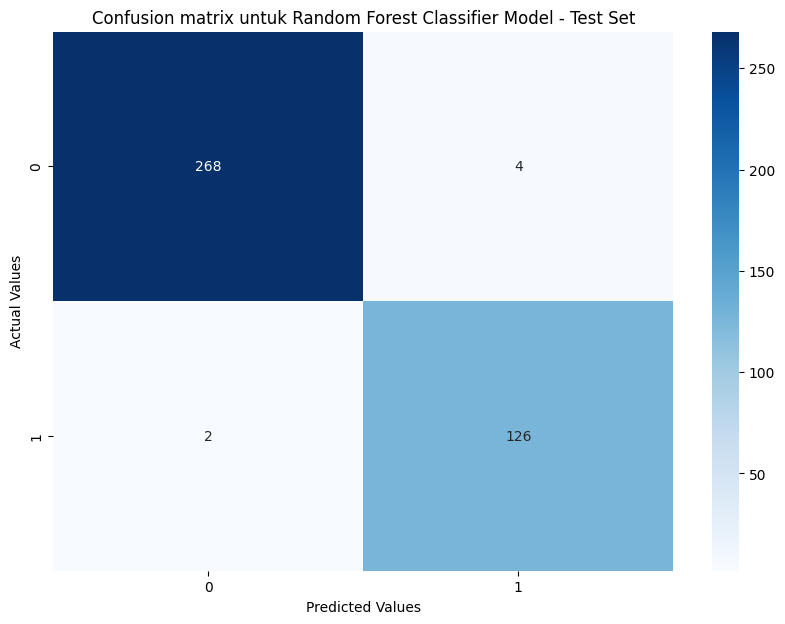

In [22]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix untuk Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [23]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 98.5%


In [24]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.97      0.98      0.98       128

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.98      0.99       400



In [25]:
# Creating a confusion matrix for training set
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   0,  556]], dtype=int64)

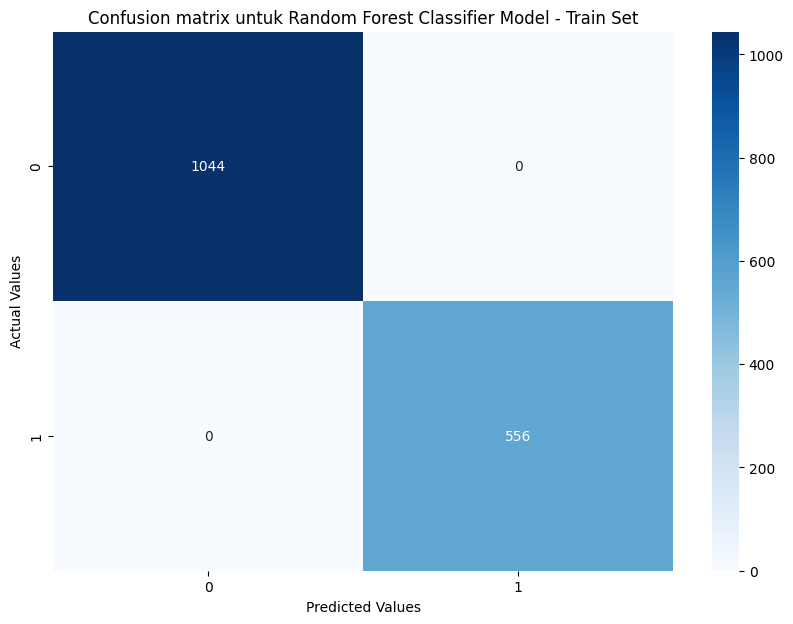

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix untuk Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [27]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 100.0%


In [28]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Prediksi

Setelah kita sudah membuat model dan mengevaluasi model kita dapat menggunakan model tersebut untuk melakukan prediksi terhadap data bsru yang kita masukan.

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return model.predict(x)

In [31]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Hasil dan Kesimpulan

Model yang kita buat sudah dapat memprediksi apakah seseorang terdiagnosis diabetes atau tidak dengan menginputkan data Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age secara berurutan. Silahkan kalian coba untuk membuat model machine learning menggunakan random forest dan lakukan prediksi menggunakan data baru. Semoga bermanfaat dan selamat belajar :)